<a href="https://colab.research.google.com/github/sundar-nallalagappan/Horses_or_humans/blob/main/Horse_vs_Humans_ImageGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("sairam")

sairam


credits:
https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C1/W4/ungraded_labs/C1_W4_Lab_1_image_generator_no_validation.ipynb

# Train set

In [3]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-06-13 04:12:53--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 64.233.170.128, 172.253.118.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  22.7MB/s    in 7.2s    

2023-06-13 04:13:01 (19.7 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



# Validation set

In [1]:
# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2023-06-13 04:12:30--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 64.233.170.128, 172.253.118.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  7.16MB/s    in 1.5s    

2023-06-13 04:12:33 (7.16 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



# Unzip the file

In [4]:
import zipfile

# Unzip the dataset
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

# Unzip validation set
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

#Import the libraries

In [5]:
import os
import tensorflow as tf
print(tf.__version__)

from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator


#Visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

2.12.0


In [5]:
train_horse_dir = os.path.join('horse-or-human', 'horses')
print(train_horse_dir)

print(f"Number of images in train-horse dir {len(os.listdir(train_horse_dir))}")
print('\n')

train_humans_dir = os.path.join('horse-or-human', 'humans')
print(train_humans_dir)

print(f"Number of images in train-humans dir {len(os.listdir(train_humans_dir))}")

horse-or-human/horses
Number of images in train-horse dir 500


horse-or-human/humans
Number of images in train-humans dir 527


In [6]:
valid_horse_dir = os.path.join('validation-horse-or-human', 'horses')
print(valid_horse_dir)

print(f"Number of images in valid_horse_dir {len(os.listdir(valid_horse_dir))}")
print('\n')

valid_humans_dir = os.path.join('validation-horse-or-human', 'humans')
print(valid_humans_dir)
print(f"Number of images in valid_humans_dir {len(os.listdir(valid_humans_dir))}")


validation-horse-or-human/horses
Number of images in valid_horse_dir 128


validation-horse-or-human/humans
Number of images in valid_humans_dir 128


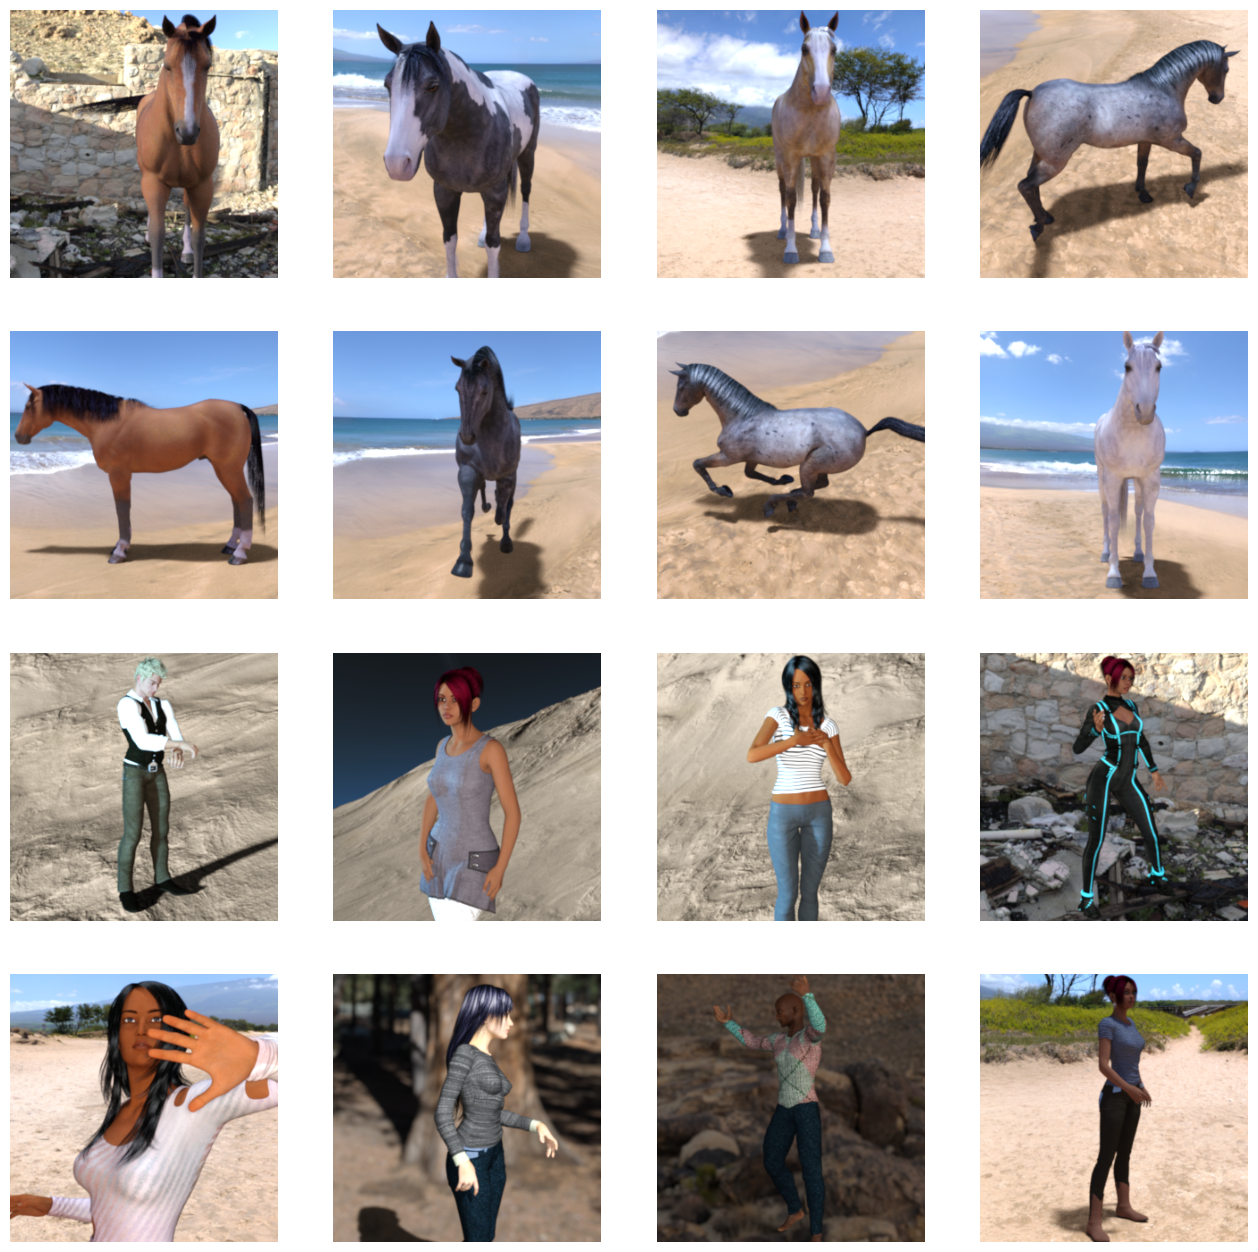

In [6]:
nrows=4
ncols=4
pic_idx = 8

horse_pics_display  = [os.path.join(train_horse_dir, img) for img in os.listdir(train_horse_dir)[pic_idx-8:pic_idx]]
humans_pics_display = [os.path.join(train_humans_dir, img) for img in os.listdir(train_humans_dir)[pic_idx-8:pic_idx]]

fig = plt.gcf()
fig.set_size_inches(nrows*4, ncols*4)

for i, img_path in enumerate(horse_pics_display + humans_pics_display):
  #print(i)
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


# Building a Small Model from Scratch

In [7]:
model = Sequential([
    #1st Conv layer
    Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(300,300,3)),
    MaxPooling2D(2,2),

    #2nd Conv layer
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(2,2),

    #3rd conv layer
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(2,2),

    #4th conv layer
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(2,2),

    #5th conv layer
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(2,2),

    ## Flatten the results to feed into a DNN
    Flatten(),

    # 512 neuron hidden layer 
    Dense(512, activation='relu'),

    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    Dense(1, activation='sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [9]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics='accuracy')

# Data Preprocessing

In [10]:
train_gen = ImageDataGenerator(rescale=1./255)
train_generator = train_gen.flow_from_directory("/content/horse-or-human", 
                              target_size=(300,300),
                              batch_size=128,
                              class_mode='binary'
                              )

valid_gen = ImageDataGenerator(rescale=1./255)
valid_generator = train_gen.flow_from_directory("/content/validation-horse-or-human", 
                              target_size=(300,300),
                              batch_size=32,
                              class_mode='binary'
                              )

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [12]:
model.fit(train_generator, epochs=5, steps_per_epoch=8, validation_data=valid_generator, validation_steps=8)

Epoch 1/5
8/8 [==============================] - 8s 985ms/step - loss: 0.2169 - accuracy: 0.9277 - val_loss: 0.8489 - val_accuracy: 0.8203
Epoch 2/5
8/8 [==============================] - 8s 1s/step - loss: 0.0920 - accuracy: 0.9707 - val_loss: 1.8698 - val_accuracy: 0.7930
Epoch 3/5
8/8 [==============================] - 8s 1s/step - loss: 0.2376 - accuracy: 0.9355 - val_loss: 1.0887 - val_accuracy: 0.8164
Epoch 4/5
8/8 [==============================] - 8s 1s/step - loss: 0.0870 - accuracy: 0.9689 - val_loss: 1.4189 - val_accuracy: 0.8164
Epoch 5/5
8/8 [==============================] - 8s 964ms/step - loss: 0.0280 - accuracy: 0.9933 - val_loss: 1.9982 - val_accuracy: 0.8281


# Inference

In [13]:
import numpy as np
from keras.utils import img_to_array, load_img
from google.colab import files

In [33]:
uploaded = files.upload()

for file in uploaded.keys():
  path = '/content/' + file

  img = load_img(path, target_size=(300,300))
  x = img_to_array(img)
  x = x/255

  print(x.shape)

  x = np.expand_dims(img, axis=0)

  classes = model.predict(x, batch_size=10)
  print(classes[0])

  if classes[0]>0.5:
    print(file + " is a human")
  else:
    print(file + " is a horse")

Saving horse01-0.png to horse01-0 (5).png
(300, 300, 3)
1/1 [==============================] - 0s 20ms/step
[0.]
horse01-0.png is a horse
